In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, Binarizer, LabelBinarizer, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
import pandas as pd
from sklearn.datasets import make_classification, load_digits
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import chi2, SelectKBest

from scipy.stats import f_oneway
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [3]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,categorie_imc
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1,surpoids
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0,obésité modérée
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0,obésité modérée
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0,poids normal
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0,surpoids
...,...,...,...,...,...,...,...,...,...,...,...,...
1331,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0,obésité modérée
1332,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0,obésité modérée
1333,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0,obésité sévère
1334,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1,surpoids


In [4]:
model = LinearRegression()
y = data_cleaned["charges"]
X = data_cleaned[["age", "bmi", "smoker"]]
print(X)


      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1331   50  30.970       0
1332   18  31.920       0
1333   18  36.850       0
1334   21  25.800       0
1335   61  29.070       1

[1336 rows x 3 columns]


In [5]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)
model.predict(X )

array([26083.43268386,  3894.1823853 ,  6239.54119437, ...,
        4887.70451212,  2101.40439834, 37354.54729443], shape=(1336,))

In [6]:
data_cleaned = data_cleaned[["age", "bmi", "smoker","charges"]]
data_cleaned.head()


,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1331    10600.54830
1332     2205.98080
1333     1629.83350
1334     2007.94500
1335    29141.36030
Name: charges, Length: 1336, dtype: float64

In [8]:
X

NameError: name 'X' is not defined

In [9]:
model.fit(X, y)
model.score(X, y)

0.7472960284794193

division du data set en train set/ test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

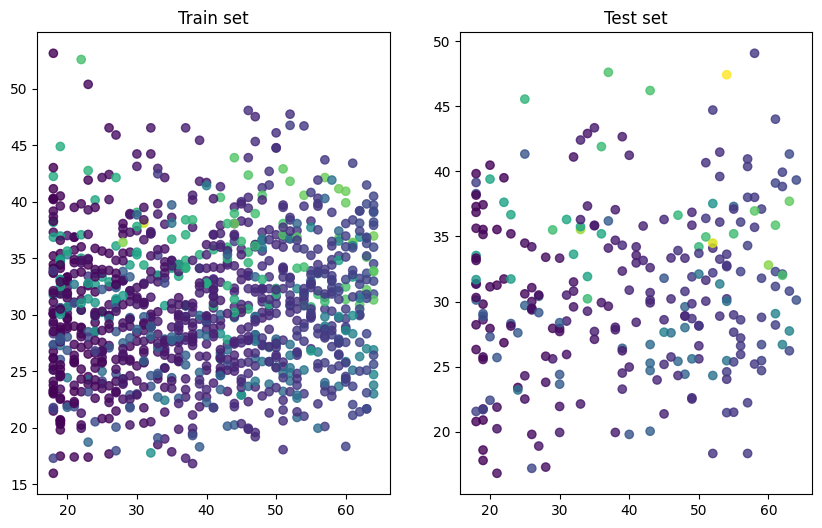

In [11]:



X_train = X_train.values
X_test = X_test.values

plt.figure(figsize=(10, 6))

# training set
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title("Train set")

#  test set
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title("Test set")

plt.show()


In [12]:
model = LinearRegression()  

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7492396574035407
0.739457933638058


/home/flavigny/Documents/DEV_IA/assurance/Projet_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


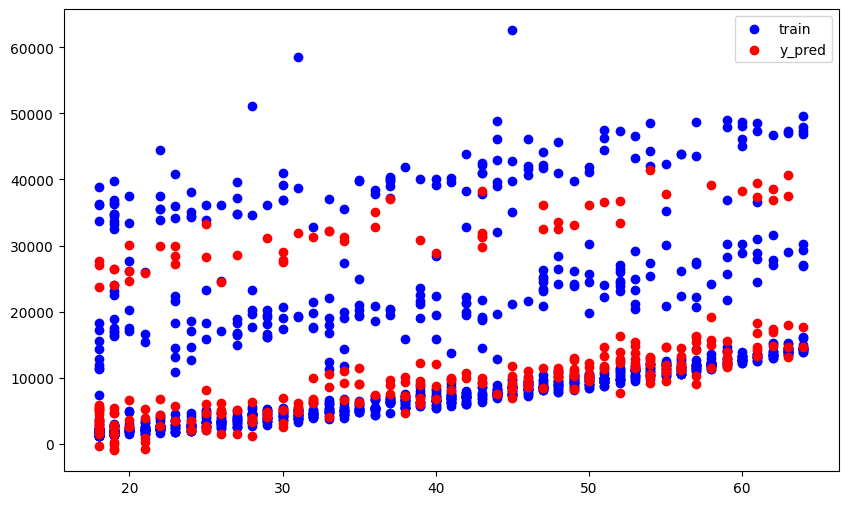

In [13]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', label='train')
plt.scatter(X_test[:, 0], y_pred, color='red', label='y_pred')
plt.legend()

/home/flavigny/Documents/DEV_IA/assurance/Projet_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


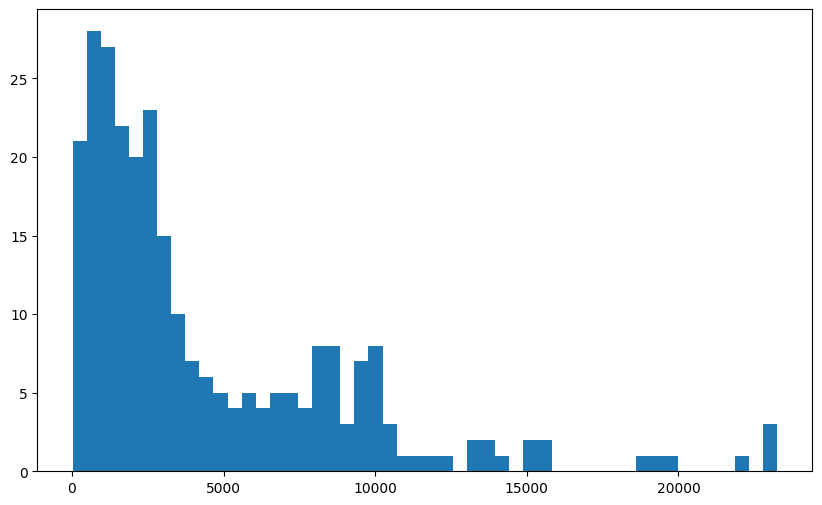

In [14]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))

erreur_histo = np.abs(y_test - y_pred)
plt.hist(erreur_histo, bins=50)
plt.show()

In [15]:
cross_val_score(model, X_train, y_train, cv=5, scoring="r2")

array([0.72743946, 0.7749852 , 0.72306059, 0.78661398, 0.71798073])

In [16]:
cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()

np.float64(0.7460159928781307)

In [17]:
from sklearn.model_selection import validation_curve                                                                                                                             

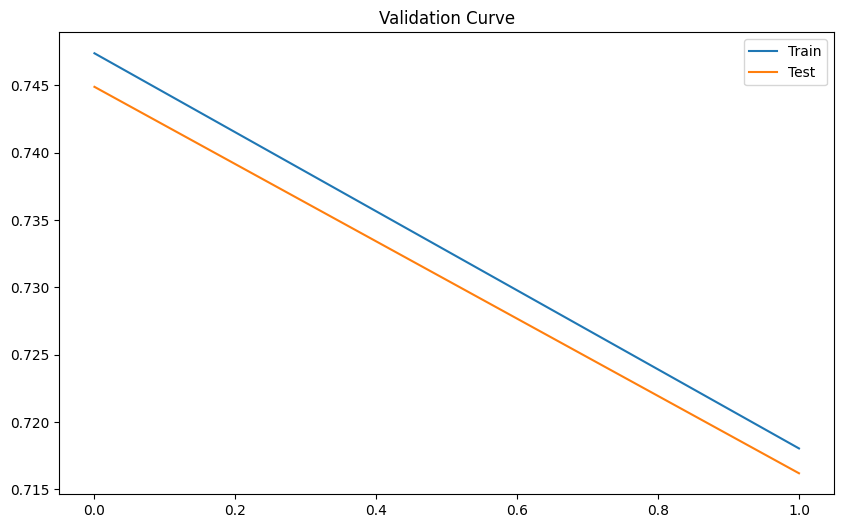

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
train_scores, test_scores = validation_curve(model, X, y, param_name="fit_intercept", param_range=[True, False], cv=5)



plt.figure(figsize=(10, 6))
plt.plot(train_scores.mean(axis=1), label="Train")
plt.plot(test_scores.mean(axis=1), label="Test")
plt.title("Validation Curve")
plt.legend()


In [19]:
#confusion_matrix(y_test, model.predict(X_test))

Learning curve

In [20]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
print(N)

[ 85 170 256 341 427 512 597 683 768 854]


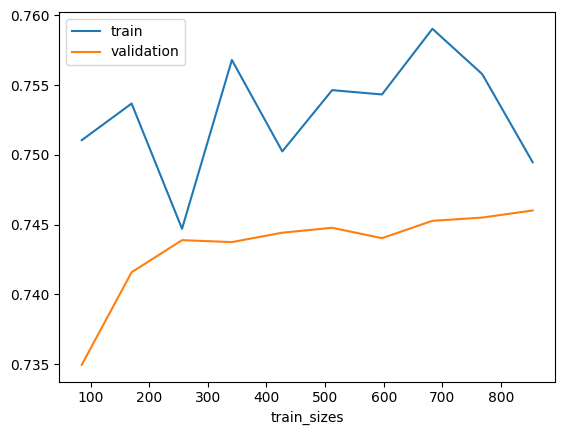

In [21]:
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train_sizes")
plt.legend()

Normalisation des données du dataframe

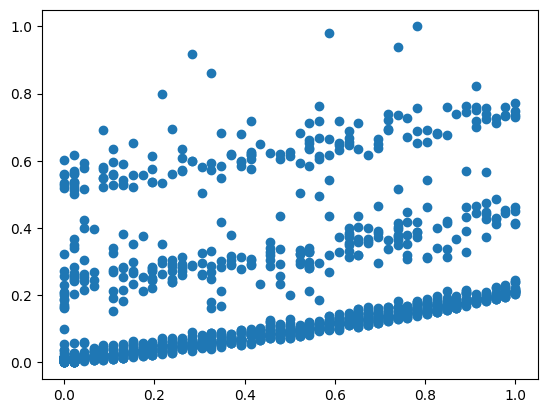

In [22]:
scaler = MinMaxScaler()
y_rescaled = y.to_numpy().reshape(-1, 1)
y_minmax = scaler.fit_transform(y_rescaled)

X_minmax = scaler.fit_transform(X)



plt.scatter(X_minmax[:,0], y_minmax)

plt.show()

standardisation

In [23]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.44008442, -0.45268356,  1.96873371],
       [-1.51135777,  0.50964281, -0.50794071],
       [-0.79862428,  0.3834092 , -0.50794071],
       ...,
       [-1.51135777,  1.01457726, -0.50794071],
       [-1.29753772, -0.79695705, -0.50794071],
       [ 1.55339624, -0.26087405,  1.96873371]], shape=(1336, 3))

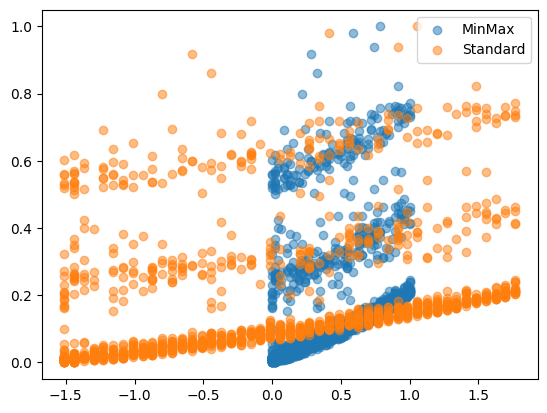

In [24]:
scaler = MinMaxScaler()
y_rescaled = y.to_numpy().reshape(-1, 1)
y_minmax = scaler.fit_transform(y_rescaled)

X_minmax = scaler.fit_transform(X)
stdscaler = StandardScaler()
X_stdscl = stdscaler.fit_transform(X)

plt.scatter(X_minmax[:,0], y_minmax, alpha=0.5, label="MinMax")
plt.scatter(X_stdscl[:,0], y_minmax, alpha=0.5, label="Standard")

plt.legend()
plt.show()

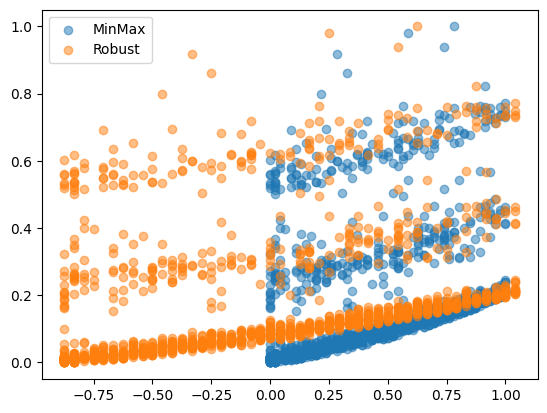

In [25]:
X_robust = RobustScaler().fit_transform(X)
plt.scatter(X_minmax[:,0], y_minmax, alpha=0.5, label="MinMax")
plt.scatter(X_robust[:,0], y_minmax, alpha=0.5, label="Robust")

plt.legend()

###one hot encoding de bmi


In [26]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,categorie_imc
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1,surpoids
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0,obésité modérée
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0,obésité modérée
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0,poids normal
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0,surpoids
...,...,...,...,...,...,...,...,...,...,...,...,...
1331,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0,obésité modérée
1332,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0,obésité modérée
1333,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0,obésité sévère
1334,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1,surpoids


In [27]:
data_normalise = pd.get_dummies(data_cleaned, columns=["categorie_imc"], dtype=int)
print(data_normalise)

      age  sex     bmi  children  smoker     region      charges  \
0      19    0  27.900         0       1  southwest  16884.92400   
1      18    1  33.770         1       0  southeast   1725.55230   
2      28    1  33.000         3       0  southeast   4449.46200   
3      33    1  22.705         0       0  northwest  21984.47061   
4      32    1  28.880         0       0  northwest   3866.85520   
...   ...  ...     ...       ...     ...        ...          ...   
1331   50    1  30.970         3       0  northwest  10600.54830   
1332   18    0  31.920         0       0  northeast   2205.98080   
1333   18    0  36.850         0       0  southeast   1629.83350   
1334   21    0  25.800         0       0  southwest   2007.94500   
1335   61    0  29.070         0       1  northwest  29141.36030   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                    0                 0                 0                 1   
1                    0 

Correlation de Pearson (exemple)

In [28]:
X = data_normalise.drop(columns=["charges", "region", "bmi"])
y = data_normalise["charges"]

In [29]:


X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)


In [30]:

correlations_pearson = {}
for column in X.columns:
    correlation, _ = pearsonr(X[column], y)
    correlations_pearson[column] = correlation

for feature, correlation in correlations_pearson.items():
    print(f"correlation de Pearson entre {feature} et Charges = {correlation}")

correlation de Pearson entre age et Charges = 0.2983724030209961
correlation de Pearson entre sex et Charges = 0.05821318636702949
correlation de Pearson entre children et Charges = 0.06722519085925699
correlation de Pearson entre smoker et Charges = 0.7873945109719374
correlation de Pearson entre region_northeast et Charges = 0.00602771071896978
correlation de Pearson entre region_northwest et Charges = -0.03899590036573278
correlation de Pearson entre region_southeast et Charges = 0.07367749990097228
correlation de Pearson entre region_southwest et Charges = -0.04356146163929489
correlation de Pearson entre categorie_imc_obésité modérée et Charges = 0.06203103235549988
correlation de Pearson entre categorie_imc_obésité morbide et Charges = 0.07703052365072427
correlation de Pearson entre categorie_imc_obésité sévère et Charges = 0.14000095816498243
correlation de Pearson entre categorie_imc_poids normal et Charges = -0.10657811771829293
correlation de Pearson entre categorie_imc_sous

###chi 2

In [31]:
X = data_normalise[["sex"]]
y = data_normalise["smoker"]
Chi2_stats, p_values = chi2(X, y)

Chi2_stats

p_values

print(f"Relation Sex/Smoker\n Chi2 = {Chi2_stats} et p_values = {p_values} ")

Relation Sex/Smoker
 Chi2 = [3.84295178] et p_values = [0.0499555] 


###Anova

In [32]:
Cat_souspoid = data_normalise.loc[data_normalise["categorie_imc_surpoids"] == 1, "charges"]
Cat_normal = data_normalise.loc[data_normalise["categorie_imc_poids normal"] == 1, "charges"]
Cat_surpoid = data_normalise.loc[data_normalise["categorie_imc_surpoids"] == 1, "charges"]
Cat_obesite = data_normalise.loc[data_normalise["categorie_imc_obésité modérée"] == 1, "charges"]
Cat_sev = data_normalise.loc[data_normalise["categorie_imc_obésité sévère"] == 1, "charges"]
Cat_morbide = data_normalise.loc[data_normalise["categorie_imc_obésité morbide"] == 1, "charges"]

In [33]:
print(Cat_normal)


3       21984.47061
15       1837.23700
17       2395.17155
26      14451.83515
35       1625.43375
           ...     
1302    21259.37795
1304    16115.30450
1312    18765.87545
1314     1731.67700
1326    22395.74424
Name: charges, Length: 225, dtype: float64


In [34]:
print(Cat_morbide)

14      39611.7577
18      10602.3850
82      11033.6617
115     11381.3254
169     13405.3903
           ...    
1238    47269.8540
1310     4536.2590
1315     1163.4627
1321    43896.3763
1330    11411.6850
Name: charges, Length: 92, dtype: float64


In [35]:
print(Cat_obesite)

1        1725.55230
2        4449.46200
6        8240.58960
12       1826.84300
16      10797.33620
           ...     
1324     7050.02130
1325     9377.90470
1329    10795.93733
1331    10600.54830
1332     2205.98080
Name: charges, Length: 389, dtype: float64


In [36]:
print(Cat_souspoid)

0       16884.92400
4        3866.85520
5        3756.62160
7        7281.50560
8        6406.41070
           ...     
1319    28101.33305
1322     4239.89265
1328    12629.16560
1334     2007.94500
1335    29141.36030
Name: charges, Length: 386, dtype: float64


In [37]:
print(Cat_souspoid)

0       16884.92400
4        3866.85520
5        3756.62160
7        7281.50560
8        6406.41070
           ...     
1319    28101.33305
1322     4239.89265
1328    12629.16560
1334     2007.94500
1335    29141.36030
Name: charges, Length: 386, dtype: float64


In [38]:
data_cat = pd.DataFrame({ 'Cat_souspoid': Cat_souspoid,
                          'Cat_normal': Cat_normal,
                        'Cat_surpoid': Cat_surpoid,
                        'Cat_obesite': Cat_obesite,
                        'Cat_sev': Cat_sev,
                        'Cat_morbide': Cat_morbide })

#data_cat = data_cat.apply(lambda x: x.fillna(x.mean()), axis=0)


In [39]:
"""X = data_cat
y = data_normalise.loc[X.index, "charges"]

f_statistic, p_values = f_classif(X, y)

print("f statistic", f_statistic)
print("Pvalue", p_values)"""

'X = data_cat\ny = data_normalise.loc[X.index, "charges"]\n\nf_statistic, p_values = f_classif(X, y)\n\nprint("f statistic", f_statistic)\nprint("Pvalue", p_values)'

In [40]:
stat_anova, p_value = f_oneway(Cat_souspoid,
                          Cat_normal,
                        Cat_surpoid,
                        Cat_obesite,
                        Cat_sev,
                        Cat_morbide)

In [41]:
print(stat_anova)
print(p_value)

16.654663876874885
4.3469157339964486e-16


###Pipelines

In [42]:
print(data_cleaned.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'categorie_imc'],
      dtype='object')


In [10]:
X = data_cleaned[["age", "sex", "children", "smoker","region", "categorie_imc"]]
y = data_cleaned["charges"]

### Pipelines

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=X["smoker"])

In [12]:
preprocessor = ColumnTransformer(
     transformers=[ 
         ('standardisation', StandardScaler(), ["children", "age"]),
        ('ordinal_encoding', OrdinalEncoder(), ["smoker", "sex"]),
        ('one_hot_encoding', OneHotEncoder(), ["region", "categorie_imc"]),
        
          ] )
  


In [65]:
preprocessor = make_pipeline(make_column_transformer((StandardScaler(), ['children','age']),
                                                     (OrdinalEncoder(), ['smoker', 'sex']), (OneHotEncoder(),['region',"categorie_imc"])), PolynomialFeatures(2))

In [63]:
preprocessor.fit_transform(X_train)

array([[ 2.39989791,  0.64312011,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.91587307, -0.99088924,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.91587307,  0.92729565,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08693033, -0.35149428,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.91587307,  1.35355896,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08693033, -1.34610867,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(1068, 14))

In [48]:
pipeline_RegLin = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

pipeline_lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Lasso(alpha=0.1))
    ])

pipeline_ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

pipeline_elasticnet = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", ElasticNet(alpha=1.0, l1_ratio=0.5))
])



In [66]:
def train(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


In [67]:
mse_lr = train(pipeline_RegLin, X_train, X_test, y_train, y_test)
mse_lasso = train(pipeline_lasso, X_train, X_test, y_train, y_test)
mse_ridge = train(pipeline_ridge, X_train, X_test, y_train, y_test)
mse_elasticNet = train(pipeline_elasticnet, X_train, X_test, y_train, y_test)



/home/flavigny/Documents/DEV_IA/assurance/Projet_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.699e+09, tolerance: 1.563e+07
  model = cd_fast.enet_coordinate_descent(


In [68]:
print(f"regression lineaire MSE: {mse_lr}")
print(f"Lasso MSE: {mse_lasso}")
print(f"Ridge MSE: {mse_ridge}")
print(f"ElasticNet MSE: {mse_elasticNet}")

regression lineaire MSE: 19505702.668718595
Lasso MSE: 19478543.91402932
Ridge MSE: 19325478.09983141
ElasticNet MSE: 58966629.26166396


In [13]:
print(X_train)


      age  sex  children  smoker     region    categorie_imc
389    48    1         4       0  northeast   obésité sévère
422    25    1         0       0  northeast  obésité modérée
1096   52    0         0       0  northeast  obésité modérée
903    26    0         2       0  northeast         surpoids
1333   18    0         0       0  southeast   obésité sévère
...   ...  ...       ...     ...        ...              ...
674    55    0         3       0  southeast  obésité morbide
752    24    1         4       0  northeast  obésité modérée
319    34    1         1       0  northwest         surpoids
1149   58    0         0       0  northwest   obésité sévère
515    20    1         1       0  southeast   obésité sévère

[1068 rows x 6 columns]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42, stratify=X["smoker"])
print(X_train.shape)

(1135, 6)


In [15]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("polynomial_features", PolynomialFeatures()),
    ("linear_regression", LinearRegression())
])

param_grid = {
    "polynomial_features__degree":[1, 2, 3]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")

grid.fit(X_train, y_train)

print(grid.score(X_test, y_test))
print(grid.best_params_)

0.8689788326790507
{'polynomial_features__degree': 2}
